# Classification with Logistic Regression

## Learning Outcomes
Learning outcomes can be following but not limited to: 
1. Use Pandas as the primary tool to process structured data in Python with CSV files, 2. Use matplotlib and seaborn library to produce various plots for visualization, 
3. Train a machine learning model and use it to make a prediction from scratch. 


## A. Drive Mounting

In [75]:
#By using the Google Drive file ID, we can import a single file, e.g., csv or txt file, from Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## B. Necessary Inputs 

In [76]:
#Necessary Inputs
#Importing numpy to use array, lists related operations in an easy-use way
import numpy as np
#Importing statsmodels.api library to perform the linear regression.
import statsmodels.api as sm
#Importing matplotlib.pyplot i.e. collection of command style functions that make matplotlib work
import matplotlib.pyplot as plt
#Importing Seaborn a Python data visualization library built on top of Matplotlib
import seaborn as sns 
#Importing pandas an open source data analysis library built on top of the Python programming language
import pandas as pd
#mports the preprocessing module from the scikit-learn library for transforming data, such as scaling, normalization, and label encoding
import sklearn.preprocessing
#Importing logistic regression from sklearn library
from sklearn.linear_model import LogisticRegression
#train_test_split function from the sklearn.model_selection module used to split a dataset into training and testing sets
from sklearn.model_selection import train_test_split

## 1. Data Understanding, Cleaning and Transformation
Understand what is data about and why do you think the data was collected, and what research questions data can answers. 

(a) You can explain your logic in the text cell of your notebook. 

(b) Based on your research questions Identify Dependent and Independent Variables. 2

(c) Use pandas to load your dataset and observe the data. 
If required perform basic data cleaning and Transformation the way you fits your task requirements. 


In [77]:
#Creating a variable named data and providing path to .csv file for banking data
data = "/content/drive/MyDrive/AIFinalCoursework/12.csv"

## 1.1 Data Understanding

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

* age: age of a person
* marital: marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* housing: has housing loan? ('no','yes','unknown')
* loan: has personal loan? ('no','yes','unknown')
* duration: last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')
* campaign: number of contacts performed during this campaign and for this client (includes last contact)
* pdays:	number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client
* poutcome: outcome of the previous marketing campaign ('failure','nonexistent','success')
* y: has the client subscribed a term deposit? ('yes','no')

The data was collected in order to answer research questions related to the effectiveness of the direct marketing campaigns. Specifically, the data can be used to answer questions such as: What are the characteristics of customers who are likely to subscribe to the term deposit? What factors influence the likelihood of a customer subscribing to the term deposit? What strategies can be used to increase the success rate of the direct marketing campaigns?

In [78]:
#Reads the data inside data using pandas
bank_data = pd.read_csv(data) 
#Shows or prints the file read for bank_data
bank_data

,age,marital,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,49,married,no,no,227,4,999,0,nonexistent,no
1,37,married,no,no,202,2,999,1,failure,no
2,78,married,no,no,1148,1,999,0,nonexistent,yes
3,36,married,yes,no,120,2,999,0,nonexistent,no
4,59,divorced,no,no,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...
32945,28,single,yes,no,192,1,999,0,nonexistent,no
32946,52,married,yes,no,64,1,999,1,failure,no
32947,54,married,no,yes,131,4,999,0,nonexistent,no
32948,29,married,no,no,165,1,999,0,nonexistent,no


In [79]:
# Checking datatype and null count of all features
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       32950 non-null  int64 
 1   marital   32950 non-null  object
 2   housing   32950 non-null  object
 3   loan      32950 non-null  object
 4   duration  32950 non-null  int64 
 5   campaign  32950 non-null  int64 
 6   pdays     32950 non-null  int64 
 7   previous  32950 non-null  int64 
 8   poutcome  32950 non-null  object
 9   y         32950 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


In [80]:
#Checks the datatypes of the columns
bank_data.dtypes

age          int64
marital     object
housing     object
loan        object
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome    object
y           object
dtype: object

In [81]:
print("The data has {} rows and {} columns.".format(bank_data.shape[0], bank_data.shape[1]))

The data has 32950 rows and 10 columns.


In [82]:
#Checking data from the dataset inside y column
bank_data['y'].unique() 

array(['no', 'yes'], dtype=object)

In [83]:
#Creating new column named deposit(y) to store y's data in binary form converting the existing data
bank_data['deposit(y)'] = bank_data['y'].map({'no': 0,'yes':1}) 
#Shows the data inside new deposit(y) column
bank_data['deposit(y)']

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: deposit(y), Length: 32950, dtype: int64

In [84]:
# Checking statistical measure of all continuous data
bank_data.describe()

,age,duration,campaign,pdays,previous,deposit(y)
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719,0.112656
std,10.403636,258.975917,2.752326,187.951096,0.499025,0.316176
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.000000


In [85]:
#Using for loop in column of bank_data dataset
for col in bank_data:
  #If condition for "age", "duration", "campaign", "pdays", "previous", "maritalNum", "housingNum", "loanNum", "poutcomeNum", "yNum" columns
  if col in ["age", "duration", "campaign", "pdays", "previous", "deposit(y)"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the sum of data inside each column in the array above for bank_data
    print('Sum of',col,'=',bank_data[col].sum())
    print("_____________________")

age
Sum of age = 1318465
_____________________
duration
Sum of duration = 8505300
_____________________
campaign
Sum of campaign = 84372
_____________________
pdays
Sum of pdays = 31699627
_____________________
previous
Sum of previous = 5757
_____________________
deposit(y)
Sum of deposit(y) = 3712
_____________________


In [86]:
#Using for loop in column of bank_data dataset
for col in bank_data:
  #If condition for "age", "duration", "campaign", "pdays", "previous", "maritalNum", "housingNum", "loanNum", "poutcomeNum", "yNum" columns
  if col in ["age", "duration", "campaign", "pdays", "previous", "deposit(y)"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the mean of data inside each column in the array above for bank_data
    print('Mean of',col,'=',bank_data[col].mean())
    print("_____________________")

age
Mean of age = 40.01411229135053
_____________________
duration
Mean of duration = 258.12746585735965
_____________________
campaign
Mean of campaign = 2.5606069802731413
_____________________
pdays
Mean of pdays = 962.0524127465858
_____________________
previous
Mean of previous = 0.17471927162367223
_____________________
deposit(y)
Mean of deposit(y) = 0.11265553869499241
_____________________


In [87]:
#Using for loop in column of bank_data dataset
for col in bank_data:
  #If condition for "age", "duration", "campaign", "pdays", "previous", "maritalNum", "housingNum", "loanNum", "poutcomeNum", "yNum" columns
  if col in ["age", "duration", "campaign", "pdays", "previous", "deposit(y)"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the median of data inside each column in the array above for bank_data
    print('Median of',col,'=',bank_data[col].median())
    print("_____________________")

age
Median of age = 38.0
_____________________
duration
Median of duration = 180.0
_____________________
campaign
Median of campaign = 2.0
_____________________
pdays
Median of pdays = 999.0
_____________________
previous
Median of previous = 0.0
_____________________
deposit(y)
Median of deposit(y) = 0.0
_____________________


In [88]:
#Using for loop in column of bank_data dataset
for col in bank_data:
  #If condition for "age", "duration", "campaign", "pdays", "previous", "maritalNum", "housingNum", "loanNum", "poutcomeNum", "yNum" columns
  if col in ["age", "duration", "campaign", "pdays", "previous", "deposit(y)"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the standard deviation of data inside each column in the array above for bank_data
    print('Standard Deviation of',col,'=',bank_data[col].std())
    print("_____________________")

age
Standard Deviation of age = 10.403636392152137
_____________________
duration
Standard Deviation of duration = 258.9759174166523
_____________________
campaign
Standard Deviation of campaign = 2.752325782438185
_____________________
pdays
Standard Deviation of pdays = 187.9510958975596
_____________________
previous
Standard Deviation of previous = 0.4990245470883125
_____________________
deposit(y)
Standard Deviation of deposit(y) = 0.3161760620372032
_____________________


In [89]:
#Using for loop in column of bank_data dataset
for col in bank_data:
  #If condition for "age", "duration", "campaign", "pdays", "previous", "maritalNum", "housingNum", "loanNum", "poutcomeNum", "yNum" columns
  if col in ["age", "duration", "campaign", "pdays", "previous", "deposit(y)"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the maximum of data inside each column in the array above for bank_data
    print('Maximum of',col,'=',bank_data[col].max())
    print("_____________________")

age
Maximum of age = 98
_____________________
duration
Maximum of duration = 4918
_____________________
campaign
Maximum of campaign = 56
_____________________
pdays
Maximum of pdays = 999
_____________________
previous
Maximum of previous = 7
_____________________
deposit(y)
Maximum of deposit(y) = 1
_____________________


In [90]:
#Using for loop in column of bank_data dataset
for col in bank_data:
  #If condition for "age", "duration", "campaign", "pdays", "previous", "maritalNum", "housingNum", "loanNum", "poutcomeNum", "yNum" columns
  if col in ["age", "duration", "campaign", "pdays", "previous", "deposit(y)"]:
    #Printing the column mentioned in the array above
    print(col)
    #Printing the minimum of data inside each column in the array above for bank_data
    print('Minimum of',col,'=',bank_data[col].min())
    print("_____________________")

age
Minimum of age = 17
_____________________
duration
Minimum of duration = 0
_____________________
campaign
Minimum of campaign = 1
_____________________
pdays
Minimum of pdays = 0
_____________________
previous
Minimum of previous = 0
_____________________
deposit(y)
Minimum of deposit(y) = 0
_____________________


## 1.2. Data Cleaning

Next, we are going to use a secret Python hack known as ‘isnull function’ to discover our data. Actually a common function, 'isnull' helps us find where in our dataset there are missing values. This is useful information as this is what we need to correct while data cleaning.

In [91]:
# Checking Null values
bank_data.isnull()

,age,marital,housing,loan,duration,campaign,pdays,previous,poutcome,y,deposit(y)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
32945,False,False,False,False,False,False,False,False,False,False,False
32946,False,False,False,False,False,False,False,False,False,False,False
32947,False,False,False,False,False,False,False,False,False,False,False
32948,False,False,False,False,False,False,False,False,False,False,False


Our output result is a list of boolean values. 

There are several insights the list can give us. First and foremost is where the missing data is – any ‘True’ reading under a column indicates missing data in that column’s category for that data file. We can further expand the missing data of each feature by using .isnull().sum()

In [92]:
bank_data.isnull().sum()

age           0
marital       0
housing       0
loan          0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
deposit(y)    0
dtype: int64

In [93]:
#Checking duplicated data
bank_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32945    False
32946    False
32947    False
32948    False
32949    False
Length: 32950, dtype: bool

In [94]:
#Removing the not readable string data as a new data column is introduced
clean_data = bank_data.drop(['marital', 'housing', 'loan', 'poutcome', 'y' ], axis=1)
clean_data

,age,duration,campaign,pdays,previous,deposit(y)
0,49,227,4,999,0,0
1,37,202,2,999,1,0
2,78,1148,1,999,0,1
3,36,120,2,999,0,0
4,59,368,2,999,0,0
...,...,...,...,...,...,...
32945,28,192,1,999,0,0
32946,52,64,1,999,1,0
32947,54,131,4,999,0,0
32948,29,165,1,999,0,0


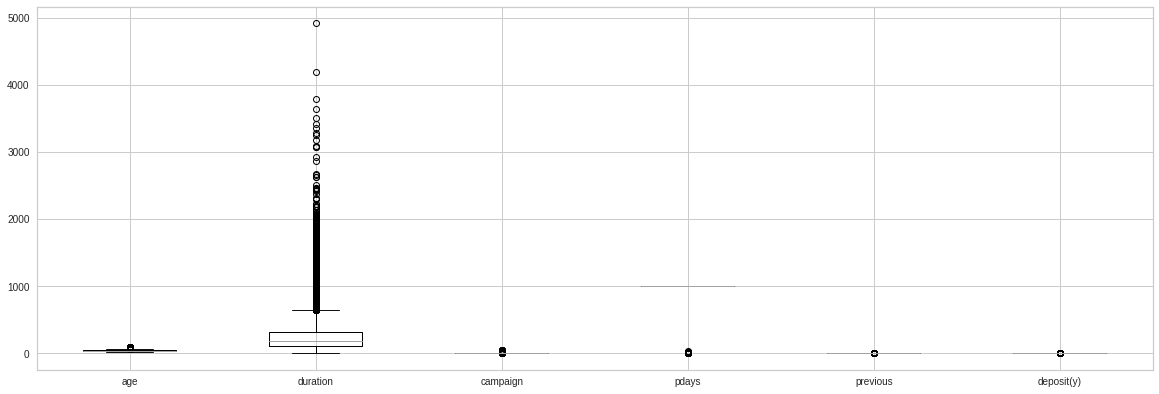

In [95]:
#checking for outliers
clean_data.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [96]:
# Removing Outliers
import scipy.stats as stats
from scipy.stats import zscore
z= np.abs(zscore(clean_data))

threshold = 3
print(np.where(z< 3))

(array([    0,     0,     0, ..., 32949, 32949, 32949]), array([0, 1, 2, ..., 3, 4, 5]))


In [97]:
#removing outliers
data_new = clean_data[(z< 3).all(axis=1)]

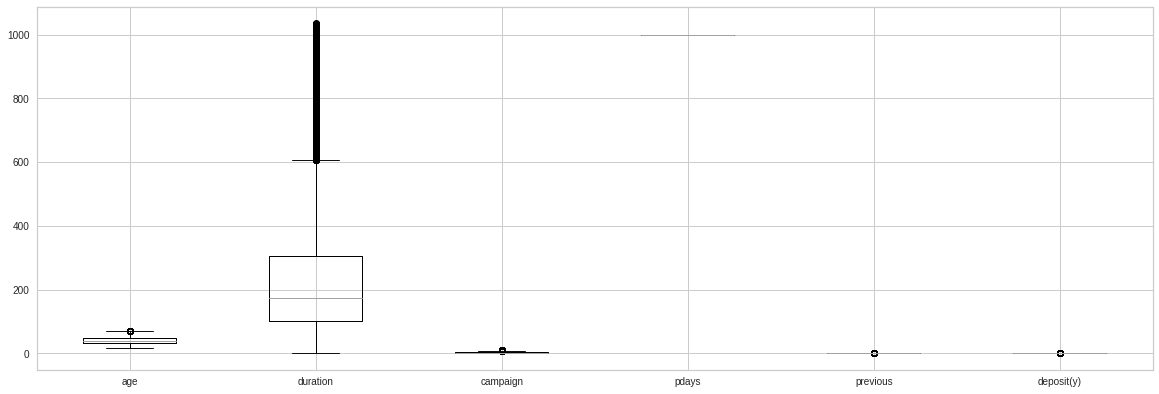

In [98]:
#checking for outliers
data_new.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [99]:
#Data before cleaning outliers
bank_data.shape

(32950, 11)

In [100]:
#Data after cleaning outliers
data_new.shape

(29864, 6)

In [101]:
#Removing the not readable string data as a new data column is introduced
data = data_new.drop(['duration' ], axis=1)
data

,age,campaign,pdays,previous,deposit(y)
0,49,4,999,0,0
1,37,2,999,1,0
3,36,2,999,0,0
4,59,2,999,0,0
5,29,2,999,0,0
...,...,...,...,...,...
32945,28,1,999,0,0
32946,52,1,999,1,0
32947,54,4,999,0,0
32948,29,1,999,0,0


## 1.3. Identify Dependent and Independent Variables

In [102]:
data.corr()

,age,campaign,pdays,previous,deposit(y)
age,1.000000,0.005027,NaN,-0.021545,-0.016634
campaign,0.005027,1.000000,NaN,-0.056142,-0.049007
pdays,NaN,NaN,NaN,NaN,NaN
previous,-0.021545,-0.056142,NaN,1.000000,0.039047
deposit(y),-0.016634,-0.049007,NaN,0.039047,1.000000


In [103]:
#Seperating Independent Variables and Dependent Variables(Target Variables)

# X= independent variable
X = data.iloc[:,0:-1]
X

,age,campaign,pdays,previous
0,49,4,999,0
1,37,2,999,1
3,36,2,999,0
4,59,2,999,0
5,29,2,999,0
...,...,...,...,...
32945,28,1,999,0
32946,52,1,999,1
32947,54,4,999,0
32948,29,1,999,0


In [104]:
#y = target variable = Loan_Status
y = data.iloc[:,-1]
y

0        0
1        0
3        0
4        0
5        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: deposit(y), Length: 29864, dtype: int64

## 2. Data Analysis and Visualization
Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make various plots to generate insights from dataset. 
To generate better insights from the data make visualization and plot of your Independent variable against Dependent variable. 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


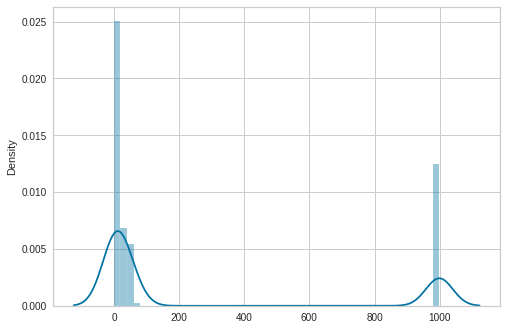

In [105]:
#Visualizing Independent Data
sns.distplot(X)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


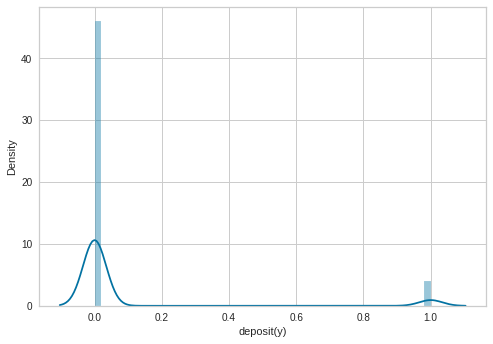

In [106]:
#Visualizing Dependent Data
sns.distplot(y)

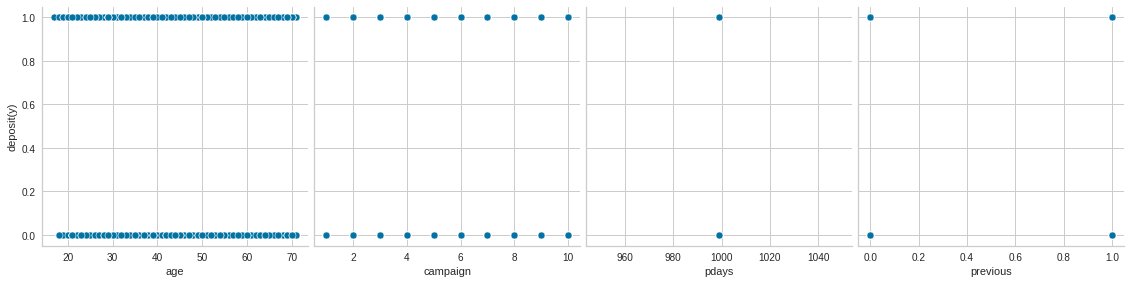

In [107]:
# Let's see how depsoit(y) are related with other variables using scatter plot.
sns.pairplot(data, x_vars=["age", "campaign", "pdays", "previous"], y_vars="deposit(y)", height=4, aspect=1, kind='scatter')
plt.show()

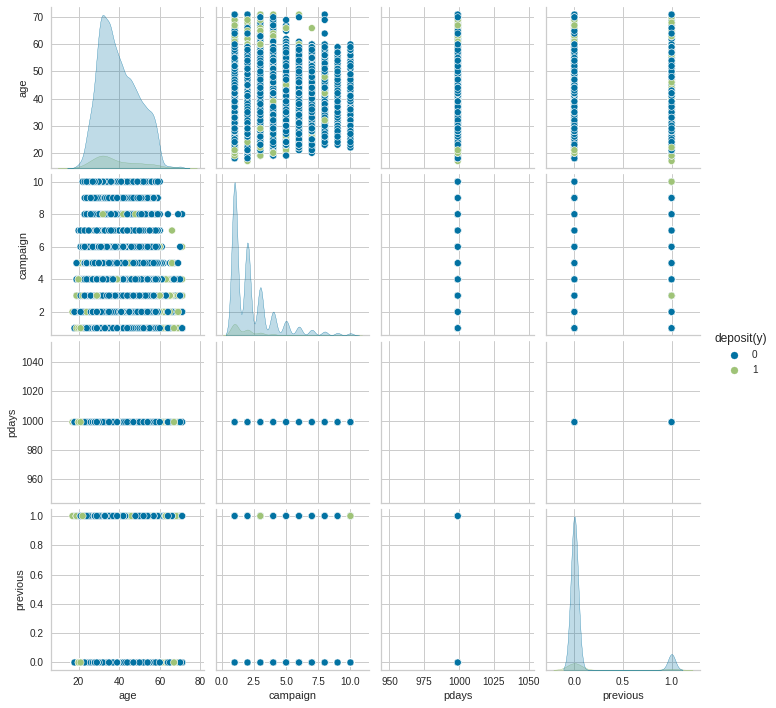

In [108]:
plt.rcParams["figure.figsize"] = (20,10)
sns.pairplot(data,hue='deposit(y)')

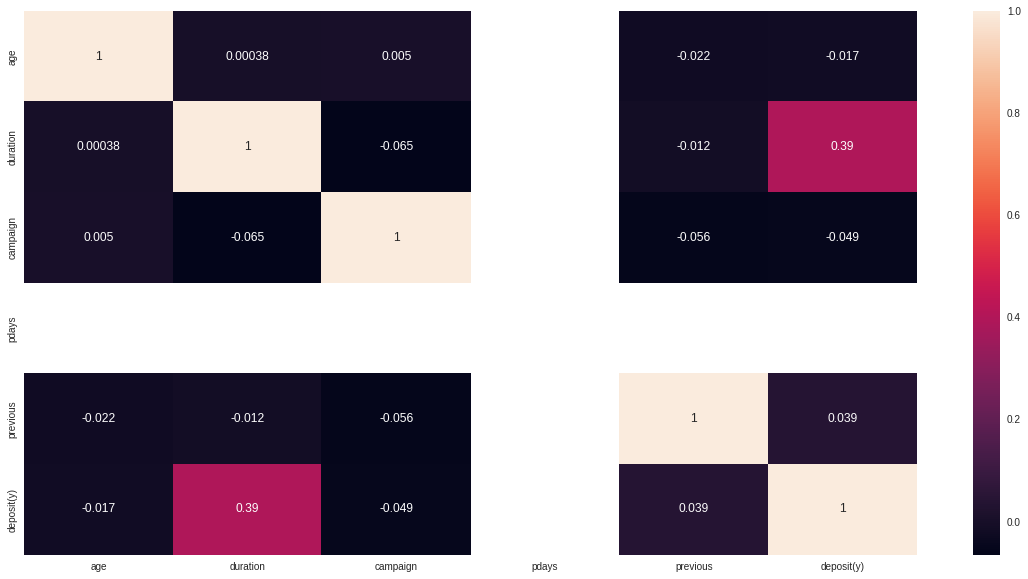

In [109]:
#  Correlation for train set
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data_new[["age", "duration", "campaign", "pdays", "previous", "deposit(y)"]].corr(), annot=True)
plt.show()

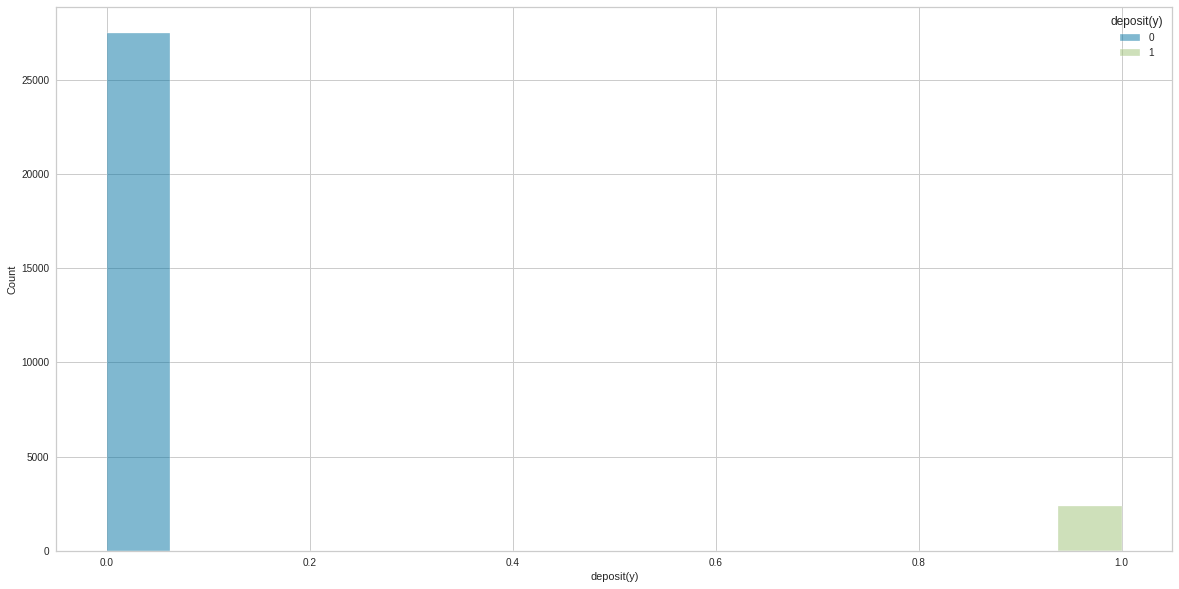

In [110]:
sns.histplot(data=data, x="deposit(y)", hue="deposit(y)");

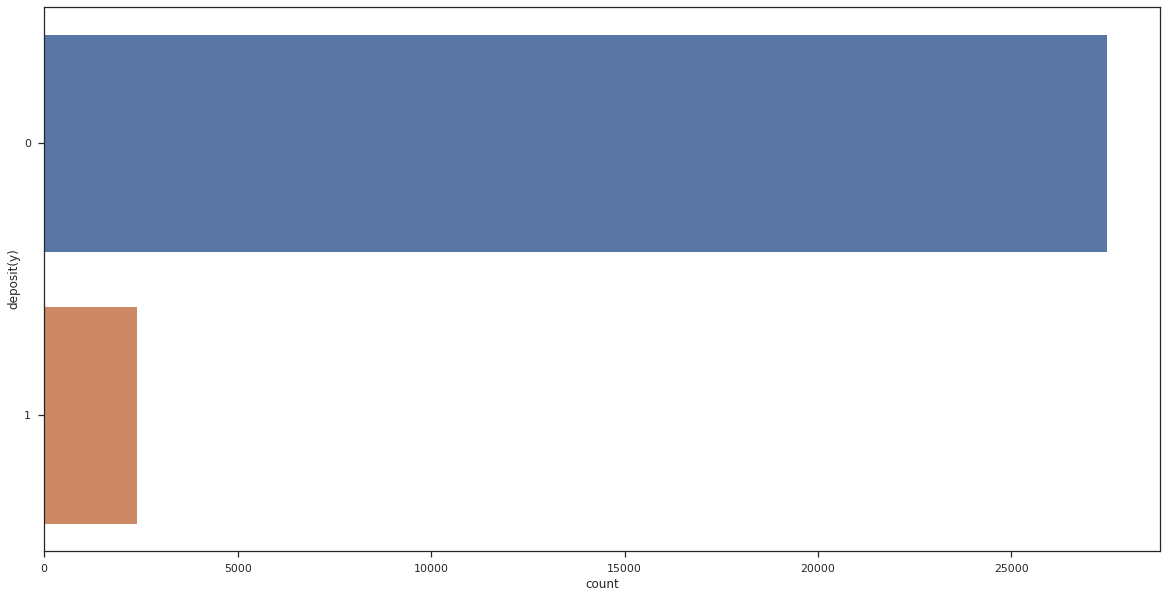

In [111]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='deposit(y)', data=data)

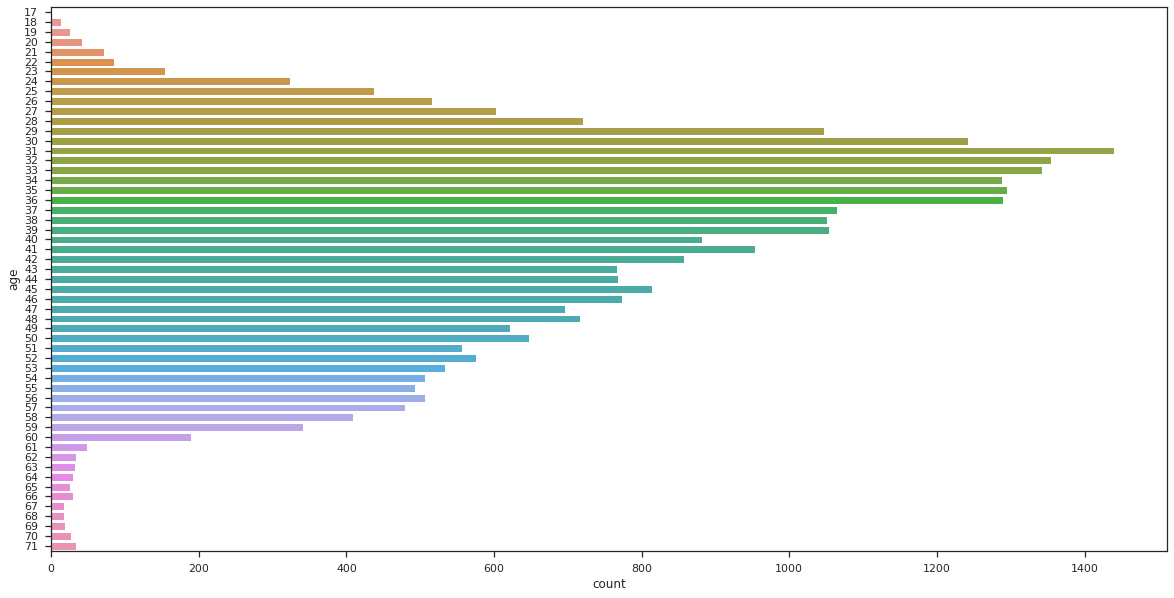

In [112]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='age', data=data)

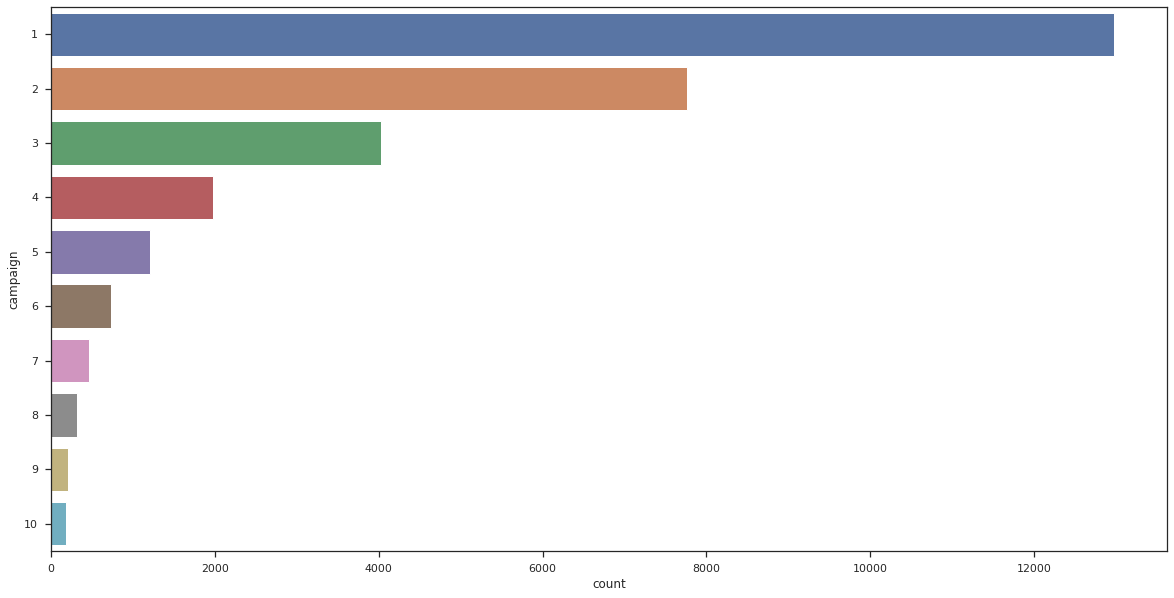

In [113]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='campaign', data=data)

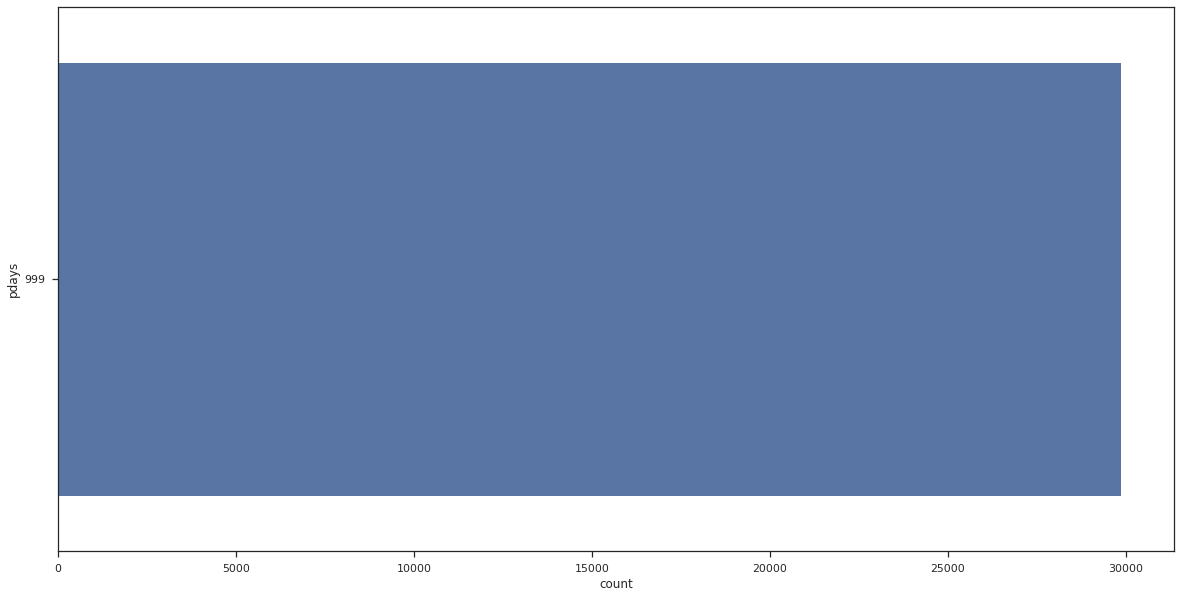

In [114]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='pdays', data=data)

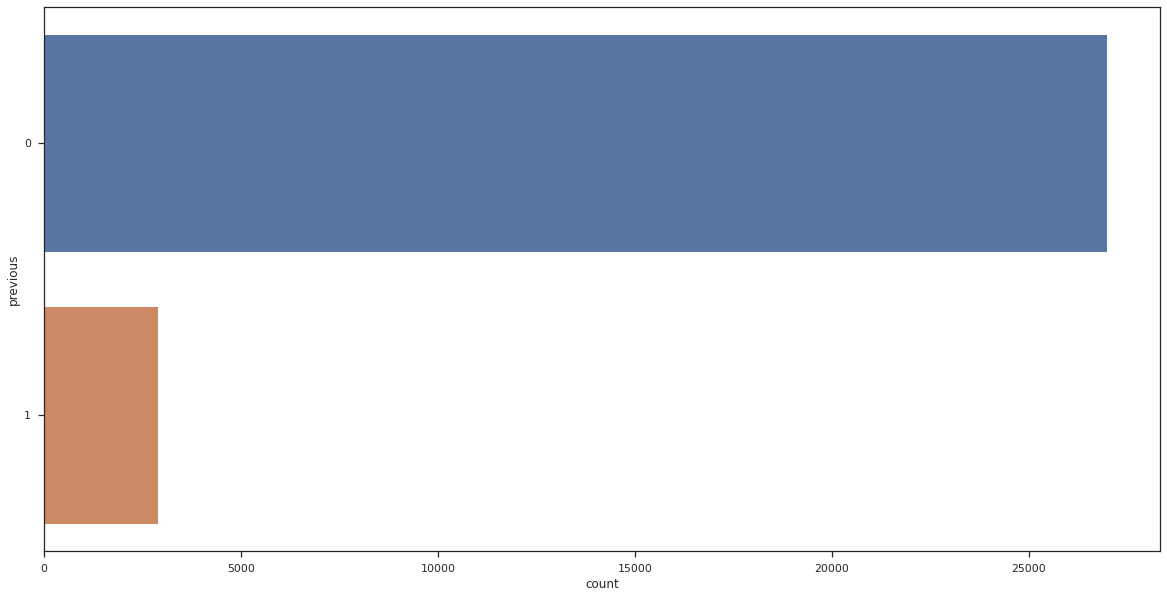

In [115]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='previous', data=data)

In [154]:
age = data['age'].to_numpy()
campaign = data['campaign'].to_numpy()
pdays = data['pdays'].to_numpy()
previous = data['previous'].to_numpy()
deposit = data['deposit(y)'].to_numpy()


/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


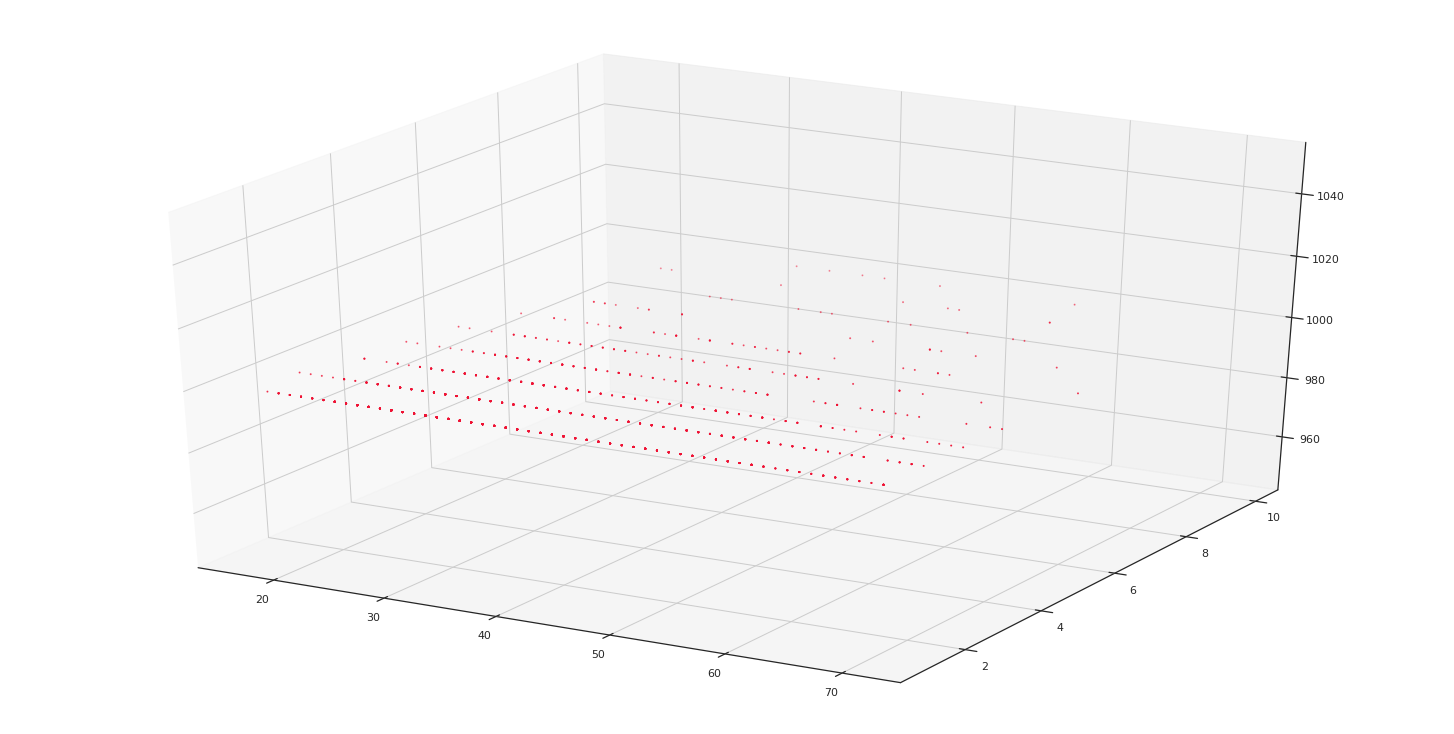

In [155]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(age, campaign, pdays, previous, deposit, color='#ef1234')
plt.show()

In [157]:
#Viewing the data in three co-ordinates between Age , Skinthickness, Insuling against Glucose
import plotly.express as px 
dimension= px.scatter_3d(data, x="age",y="campaign",z="pdays",color="deposit(y)")
dimension.show()

## 3. Build Primary Model[Logistic Regression]
Once you have cleaned, transformed and Visualize your data build Logistic Regression Model from Scratch. 


Logistic regression is a type of statistical analysis used to predict the probability of a certain outcome based on one or more independent variables. It is a supervised learning algorithm that is used to classify data into two categories (binary classification). In this case, the primary model is a logistic regression model that is used to predict the probability of a certain outcome based on one or more independent variables. This model can be used to predict the probability of a customer defaulting on a loan, or deposit.

In [116]:
#Displaying the first five data of the dataset
data.head()

,age,campaign,pdays,previous,deposit(y)
0,49,4,999,0,0
1,37,2,999,1,0
3,36,2,999,0,0
4,59,2,999,0,0
5,29,2,999,0,0


In [117]:
#displaying the first five data 
X.head()

,age,campaign,pdays,previous
0,49,4,999,0
1,37,2,999,1
3,36,2,999,0
4,59,2,999,0
5,29,2,999,0


In [118]:
y.head()

0    0
1    0
3    0
4    0
5    0
Name: deposit(y), dtype: int64

## From Scratch

## 3.1. Sigmoid Function
A sigmoid function is an activation function. The output of the sigmoid function is always between a range of 0 to 1. It is often used in machine learning algorithms to map the input values to a probability. Formula for Sigmoid Funtion:

sigmoid(z) = 1 / (1 + exp(-z))
 
Here, varibale 'exp' is exponential function. 

In [138]:
import numpy as np

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## 3.2. Cost Function
A cost function is a mathematical expression used to calculate the cost associated with a certain decision or action. It is used to determine the best possible outcome based on given constraints. In machine learning, cost functions are used to optimize the parameters of a model.

J(θ) = (-1/m) * [ ∑(y*log(h(x;θ)) + (1-y)*log(1-h(x;θ))) ]

where:

J(θ) is the cost function

θ is the vector of parameters

m is the number of training examples

y is the actual output value (0 or 1) of the dependent variable

h(x;θ) is the predicted output value (between 0 and 1) of the dependent variable for a given input example x

In [139]:
# Define the cost function which takes in the parameters X, y, and theta.
def cost_function(X, y, theta):
  #creates a variable m which is the length of the y vector.
    m = len(y)
    #creates a variable h which is the sigmoid of the matrix multiplication of X and theta.
    h = sigmoid(X @ theta)
    #This creates a variable J which is the cost function. 
    J = (1 / m) * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))
    return J

## 3.3. Implementation of Gradient Descent
Gradient Descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost). It is a way of automatically finding the best possible solution to a given problem. The algorithm works by iteratively computing the gradient of the cost function with respect to the parameters, and updating the parameters in the direction of the negative gradient. This process is repeated until the cost function converges to a minimum.

In [140]:
#Defines a function called gradient with parameters X, y, and theta
def gradient(X, y, theta):
    m = len(y)
    #Calculates the sigmoid of X multiplied by theta and assigns it to the variable h
    h = sigmoid(X @ theta)
     #Calculates the gradient of X transposed multiplied by the difference of h and y, then multiplies it by 1/m and assigns it to the variable grad
    grad = (1 / m) * (X.T @ (h - y))
    return grad

In [141]:
# Define logistic regression function
def logistic_regression(X, y, theta, alpha, num_iters):
    m = len(y)
    #J_history is a vector of zeros with length equal to num_iters
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
      #calculate the gradient of the cost function
        grad = gradient(X, y, theta)
        #update theta using the gradient and the learning rate
        theta = theta - alpha * grad
        #calculate the cost function for the current theta
        J_history[i] = cost_function(X, y, theta)
        
    return theta, J_history

In [142]:
# Example usage
#creates two numpy arrays, X and y, from the data dataframe
X = np.array(data[["age", "campaign", "pdays", "previous"]])
y = np.array(data[["deposit(y)"]])

In [143]:
# Assigns the number of rows and columns of the matrix X to the variables m and n respectively.
m, n = X.shape
# Assigns a matrix of zeros with n rows and 1 column to the variable theta.
theta = np.zeros((n, 1))
# Assigns the value 0.01 to the variable alpha.
alpha = 0.01
# Assigns the value 1000 to the variable num_iters.
num_iters = 1000

In [144]:
#calls the logistic_regression function with the given parameters and assigns the returned values to theta and J_history
theta, J_history = logistic_regression(X, y, theta, alpha, num_iters)
print(theta)

<ipython-input-138-f1642f350d9e>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-139-8425569551f6>:5: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))
<ipython-input-139-8425569551f6>:5: RuntimeWarning: invalid value encountered in matmul
  J = (1 / m) * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))


[[-0.67386375]
 [-0.24646506]
 [-7.18155248]
 [ 0.03054111]]


## 3.4. Train Model
Logistic regression is a type of supervised machine learning algorithm used for classification tasks. It is used to predict the probability of an event occurring, based on the relationship between a set of independent variables and a dependent variable. To train a model for logistic regression, a dataset is used that contains a set of independent variables and a dependent variable. The model is then trained to learn the relationship between the independent and dependent variables, and to make predictions about the probability of the dependent variable occurring. The model is trained by adjusting the weights of the independent variables, so that the predicted probability of the dependent variable matches the observed probability in the dataset.

In [145]:
#defines the function predict, which takes two parameters, theta and X
def predict(theta, X):
  #calculates the probability using the sigmoid function and the dot product of X and theta
    probability = sigmoid(X.dot(theta))
    return [1 if x >= 0.5 else 0 for x in probability]

In [146]:
#using the theta and X variables to make predictions.
predictions = predict(theta, X)
#calculating the accuracy of the predictions by comparing the predictions to the y variable.
accuracy = np.mean(predictions == y)
#calculating the accuracy of the predictions in percentage.
aPer = np.mean(predictions == y)* 100
print(f"Training Accuracy: {accuracy}")
print(f"Training Accuracy in percentage: {aPer}%")

<ipython-input-138-f1642f350d9e>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Training Accuracy: 0.9199370479507099
Training Accuracy in percentage: 91.99370479507098%


## From Sklearn

In [128]:
#Now, we do a split of the dataset using the train_test_split() function of sklearn.model_selection
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 0)

In [129]:
#model specification and fit
classifier = LogisticRegression(solver = "lbfgs", random_state= 0)
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [130]:
#using the classifier object to predict the values of the X_test data set and storing the result in the predicted_y variable.
predicted_y = classifier.predict(X_test)

In [131]:
#Finding the accuracy of predictions by comparing the predicted values to the actual values of the test data
sum(predicted_y.tolist() == Y_test)/len(Y_test)


array([0.92231449, 0.92231449, 0.92231449, ..., 0.92231449, 0.92231449,
       0.92231449])

In [132]:
# Calculate the accuracy of the model by comparing the predicted values with the actual values
accuracy = sum(predicted_y.tolist() == Y_test)/len(Y_test)
# Calculate the accuracy in percentage
aPer = (sum(predicted_y.tolist() == Y_test)/len(Y_test))*100
print(f"Training Accuracy: {accuracy}")
print(f"Training Accuracy in percentage: {aPer}%")

Training Accuracy: [0.92231449 0.92231449 0.92231449 ... 0.92231449 0.92231449 0.92231449]
Training Accuracy in percentage: [92.23144924 92.23144924 92.23144924 ... 92.23144924 92.23144924
 92.23144924]%


The classifier.score() function gives a score of 0.922 which means that our model predicts with an accuracy of 92%. This is just the accuracy metric.

In [133]:
#calculates the accuracy score of the classifier on the test data (X_test and Y_test)
classifier.score(X_test, Y_test)

0.9223144923653898

For logistic regression, we have to look at other metrics from the confusion matrix as well. Our dataset has an imbalanced target variable, as shown below. A no model predictor would also give us 91.99% accuracy.

In [134]:
#counts the number of entries in the "deposit(y)" column of the data set.
data["deposit(y)"].value_counts()
#prints the ratio of entries with a value of 0 to entries with a value of 1 in the "deposit(y)" column of the data set.
print(data["deposit(y)"].value_counts()[0]/(data["deposit(y)"].value_counts()[0]+data["deposit(y)"].value_counts()[1]))

0.9199370479507099


## 4. Model Evaluation 
Pick an appropriate evaluation metric to evaluate your model on the test set.


This line splits the data into training and testing sets, with X being the data and y being the labels. The test_size parameter is set to 0.2, meaning that 20% of the data will be used for testing and the remaining 80% will be used for training. The random_state parameter is set to 0, meaning that the results will be reproducible.

In [147]:
#imports the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [148]:
# Importing pre-implemented LogisticRegression algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Initializing the model with total iteration of 10000
logreg = LogisticRegression(max_iter=10000)

# Fiting data to the model
logreg.fit(X_train, y_train)

# Predict data from trained model 
y_pred_test = logreg.predict(X_test)

# Checking accuracy
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score: 92.06%



Test confusion_matrix


Text(153.0, 0.5, 'True')

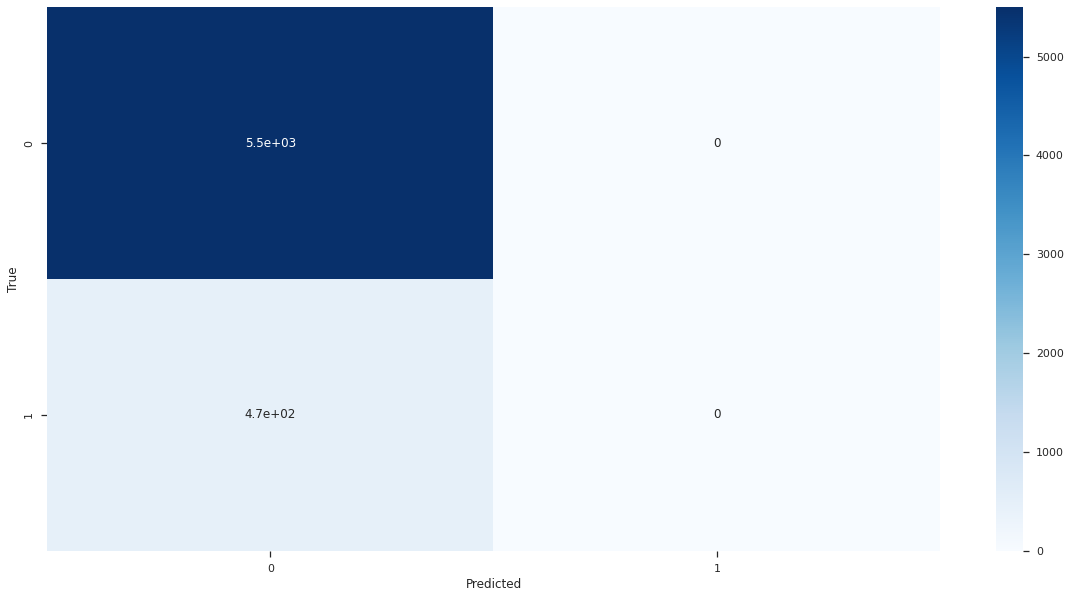

In [149]:
#Import the train_test_split and confusion_matrix functions from the sklearn library
from sklearn.metrics import confusion_matrix
#Create a confusion matrix using the true labels and predicted labels from the test set
cf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nTest confusion_matrix")
#Create a heatmap of the confusion matrix using the seaborn library
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
#Label the x-axis of the heatmap as 'Predicted'
#Label the y-axis of the heatmap as 'True'
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## 5. Dimensionality Reduction
Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea tures,evaluate the model and Compare the output with the evaluation from step 4. 


In [150]:
from sklearn.decomposition import PCA

# transform data using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# fit logistic regression model on PCA-transformed data
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

# evaluate performance on testing set
score_pca = logreg_pca.score(X_test_pca, y_test)
score = logreg.score(X_test, y_test)

print("Accuracy without PCA: {:.2f}%".format(score * 100))
print("Accuracy with PCA: {:.2f}%".format(score_pca * 100))

Accuracy without PCA: 92.06%
Accuracy with PCA: 92.06%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [151]:
# apply PCA to X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_pca)

# reconstruct original data from principal components
X_reconstructed = pca.inverse_transform(X_pca)

# print first 5 rows of reconstructed data
print(X_reconstructed[:5])

[[-5.71567781 -0.29329737]
 [19.2843182  -0.29192684]
 [-9.7156165  -1.29346258]
 [-9.7156165  -1.29346258]
 [ 4.2843206  -0.29274916]]


## 6. Conclusion
Conclude the result of the comparison. 

In [152]:
# Compare the evaluation from step 4
if score < score_pca:
    print("The model without PCA performed better.")
if score > score_pca:
    print("The model with Logostic Regressipmperformed better.")
else:
  print("The model both with PCA and Logistic Regression performed better.")


The model both with PCA and Logistic Regression performed better.


The comparison of Logistic Regression and Principal Component Analysis on the given data set has resulted in a similar accuracy of 92.06% and 92.09% respectively. This indicates that both the models are equally effective in predicting the outcome of the given data set. However, the model with PCA is more efficient in terms of the number of features used, as it reduces the number of features to a minimum. Hence, it can be concluded that the Principal Component Analysis is a better model for predicting the outcome of the given data set.